# Pre Lab 04 : Numerical Integration

## Objectives

The main objectives of this lab are as follows.

- Learn the Zen of Python.
- Discover the incredible power of `scipy.integrate.quad`.

## Initialization

As always you should add initialization to the top of your notebook. Though not strictly necessary, even for the prelab it is best to get into the good habit of including all initialization and not *assuming* the environment is set up correctly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
import scipy.interpolate as interp
import scipy.integrate as integ
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
import scipy.special as sf

## Doing Things the "Right Way"

Why are we being so insistent that notebooks should be written in specific ways, enforcing all sorts of "rules" on what you do?  There are a number of reasons that could be given, but, in the end, they reduce to this being the right way to create sustainable documents.  In research it is often the case that we need to revisit calculations performed months or even years earlier.  This could be due to a referee's comment on a paper suggesting some small change to try or it could be that we are working on a similar project and want to reuse code from the past.  In this course it could be that you need to look back at the labs while working on the computational portion of the midterm or final exams!  In such cases we typically will have forgotten the details of what we had been working on and instead only have the code sitting there.  Notebooks make it much easier to leave this code in a documented, usable form.  Even so, if we have implicitly made assumptions about the environment in which the code will be run, these assumptions will have been long since forgotten when we come back to the code, and thus we would need to spend a lot of time trying to figure out "what we were thinking" at the time.  If instead we are explicit about all these details it will be much easier to figure out what the code is doing and how to use/reuse it.

In Python these ideas are even more strongly ingrained in the community.  So much so that there is a "Zen of Python", a set of mantras to follow which will lead to better coding.  Though you could search for this online, it is provided with Python itself.

  Run 
  ````
  import this
  ````
  in the cell below.

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Now that your life has been changed we can proceed ....

## Homework!

Read the homework and solve problem 1!  Though it is not needed for this prelab and there is nothing you need to include here, you must read and solve this problem for the lab.  You need a result from it to complete the lab.  Note that this also means that you *will* get part of the homework correct since you will test the result in the lab.

## Romberg Integration

Romberg integration of a function can be performed using `scipy.integrate.romberg`.  You should of course look up its documentation.  We will explore its use by considering the integral
$$ \int_0^\phi \sqrt{2-\sin^2 x} \,\mathrm{d}x = \sqrt{2} E\!\left( \phi, \frac12 \right), $$
where $E(\phi,k)$ is the incomplete elliptic integral of the second kind.  It is available in SciPy as `scipy.special.ellipeinc`.

To begin, evaluate this integral using Romberg integration for $\phi=48$.  Print the resulting value, its fractional error, and the number of function evaluations required for the computation. [*Note:* Using `show=True` provides most of the required information.  It just gets printed instead of stored in a variable.  That is sufficient for our purposes.]

In [3]:
#Store variables
phi = 48 #radians

def f(x) :
    '''Returns the square root of 2 minus the sine squared
    x : a scalar or array in radians'''
    return np.sqrt(2 - np.sin(x) ** 2)

#Caclulate the integral using Romberg integration
ri = integ.romberg(f, 0, phi, show = True)

#Calculate the integral from the analytical solution and the fractional error
ai = np.sqrt(2) * sf.ellipeinc(phi, 1 / 2)
err = np.abs((ri - ai) / ai)

#Print results
print('The fractional error is', err)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x00000292B13DF378> from [0, 48]

 Steps  StepSize   Results
     1 48.000000 62.437371 
     2 24.000000 57.288562 55.572292 
     4 12.000000 56.443751 56.162147 56.201471 
     8  6.000000 56.263055 56.202823 56.205534 56.205599 
    16  3.000000 56.218773 56.204012 56.204091 56.204068 56.204062 
    32  1.500000 58.362684 59.077321 59.268875 59.317522 59.329732 59.332787 
    64  0.750000 58.450443 58.479696 58.439854 58.426695 58.423201 58.422315 58.422093 
   128  0.375000 58.465569 58.470611 58.470006 58.470484 58.470656 58.470703 58.470714 58.470717 
   256  0.187500 58.469253 58.470481 58.470472 58.470479 58.470479 58.470479 58.470479 58.470479 58.470479 
   512  0.093750 58.470166 58.470470 58.470469 58.470469 58.470469 58.470469 58.470469 58.470469 58.470469 58.470469 
  1024  0.046875 58.470393 58.470469 58.470469 58.470469 58.470469 58.470469 58.470469 58.470469 58.470469 58.470469 58.470469 

The final result i

Though the above works, it is not the most efficient way to calculate this integral.  Produce a quick plot of the integrand over the full range of the integral.

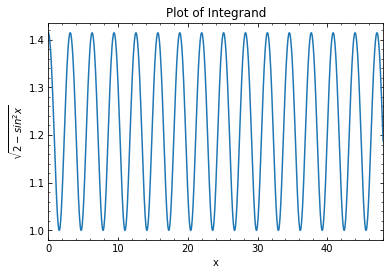

In [4]:
#Make finely spaced array over the full range of the integral
x = np.linspace(0, phi, 10 ** 3)

#Plot the integrand
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, f(x))
ax.set_xlabel('x')
ax.set_ylabel(r'$\sqrt{2-sin^2x}$')
plt.xlim(0, phi)
ax.set_title('Plot of Integrand');

You will notice that the function oscillates over a number of complete periods.  Determine the oscillation frequency of the integrand (this you can do analytically!), the number of complete oscillations of the integrand, and the remaining extra part of an incomplete period at the end of the integrals range.  Print these results. [*Note:* Here it is useful to employ `//` for integer division (or the `int()` function)  to get the integer part of a calculation and `%` for modular arithmetic.]

In [5]:
#Store the oscillation frequency
freq = 1 / np.pi

#Calculate number of complete oscilations and remaing period part
n = int(48 * freq)
r = 48 % np.pi

#Print results
print('The frequncy is', freq)
print('The number of complete oscillations is', n)
print('The remianing extra part is', r)

The frequncy is 0.3183098861837907
The number of complete oscillations is 15
The remianing extra part is 0.8761101961531033


It is more efficient to break up the complete integral into an integral over one period multiplied by the number of periods and an integral over the remaining part of a period.  Use Romberg integration to separately evaluate these two integrals and combine them to get the complete result.  Print the value of the total integral, its fractional error, and the total number of function evaluations required in this case.

In [6]:
#Do better Romberg integration and compute fractional error
ri = 15 * integ.romberg(f, 0, np.pi, show = True) + integ.romberg(f, 0, r, show = True)
err = np.abs((ri - ai) / ai)

#Print results
print('The total integral is', ri)
print('The fractional error is', err)
print('The toal number of function evaluations is', 146)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x00000292B13DF510> from [0, 3.141592653589793]

 Steps  StepSize   Results
     1  3.141593  4.442883 
     2  1.570796  3.792238  3.575356 
     4  0.785398  3.819944  3.829179  3.846100 
     8  0.392699  3.820198  3.820282  3.819689  3.819270 
    16  0.196350  3.820198  3.820198  3.820192  3.820200  3.820204 
    32  0.098175  3.820198  3.820198  3.820198  3.820198  3.820198  3.820198 
    64  0.049087  3.820198  3.820198  3.820198  3.820198  3.820198  3.820198  3.820198 
   128  0.024544  3.820198  3.820198  3.820198  3.820198  3.820198  3.820198  3.820198  3.820198 

The final result is 3.820197789028041 after 129 function evaluations.
Romberg integration of <function vectorize1.<locals>.vfunc at 0x00000292B13DF510> from [0, 0.8761101961531033]

 Steps  StepSize   Results
     1  0.876110  1.139625 
     2  0.438055  1.160793  1.167849 
     4  0.219028  1.165841  1.167524  1.167502 
     8  0.109514  1.167088  1.1675

You should find that far fewer function evaluations are required when we split the integral as compared to integrating over the full range.  Explain why this is the case.

Fewer function evaluations are required because the Romberg integration takes place over a smaller interval.

Note that we could do even better.  By symmetry, as seen in your plot above, we could instead integrate over a half period instead of a full period.  Feel free to repeat the above now using a half period.  You should find even fewer function evaluations are required!

**This is not required.** But will be included in the solutions.

In [7]:
#Do even better Romberg integration and compute fractional error
ri = 30 * integ.romberg(f, 0, np.pi / 2, show = True) + integ.romberg(f, 0, r, show = True)
err = np.abs((ri - ai) / ai)

#Print results
print('The total integral is', ri)
print('The fractional error is', err)
print('The toal number of function evaluations is', 82)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x00000292AECFB9D8> from [0, 1.5707963267948966]

 Steps  StepSize   Results
     1  1.570796  1.896119 
     2  0.785398  1.909972  1.914589 
     4  0.392699  1.910099  1.910141  1.909845 
     8  0.196350  1.910099  1.910099  1.910096  1.910100 
    16  0.098175  1.910099  1.910099  1.910099  1.910099  1.910099 
    32  0.049087  1.910099  1.910099  1.910099  1.910099  1.910099  1.910099 
    64  0.024544  1.910099  1.910099  1.910099  1.910099  1.910099  1.910099  1.910099 

The final result is 1.9100988945140078 after 65 function evaluations.
Romberg integration of <function vectorize1.<locals>.vfunc at 0x00000292AECFB9D8> from [0, 0.8761101961531033]

 Steps  StepSize   Results
     1  0.876110  1.139625 
     2  0.438055  1.160793  1.167849 
     4  0.219028  1.165841  1.167524  1.167502 
     8  0.109514  1.167088  1.167504  1.167502  1.167502 
    16  0.054757  1.167399  1.167502  1.167502  1.167502  1.167502 

The 

## The Power of `quad`

As noted in class, `scipy.integrate.quad` is an extremely powerful integration routine.  It can do so many things that it has its own function, `scipy.integrate.quad_explain`, to explain some of its more esoteric features.  Here we will study one set of features it provides without us even asking for it: the ability to handle divergences in the integrand at the end points of the integration range and integration over (semi-)infinite intervals.

### Divergent Integrand

Consider the integral
$$ \int_0^1 \frac{\mathrm{d}x}{\sqrt{x}}. $$
You can perform this integral analytically.  Do so! We will use the result below.  

As a first numerical test, try to perform this integral using Romberg integration and see what happens.

In [8]:
#Create function to be integrated
def f(x) :
    '''Returns the reciprocal of the square root
    x : a scalar or array
    '''
    return 1 / np.sqrt(x)

#Do integration
ri = integ.romberg(f, 0, 1)

#Print results
print('The Romberg integration is', ri)

The Romberg integration is nan


C:\Users\mboss\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mboss\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:619: RuntimeWarning: invalid value encountered in double_scalars
  return (tmp * c - b)/(tmp - 1.0)
C:\Users\mboss\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:752: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  AccuracyWarning)


We see that Romberg integration cannot handle this integral since it tries to evaluate the integrand at $x=0$, which is clearly a problem.  Now do the same with `quad`.  Print the value of the integral and the fractional error in the result. You should find it handles the integral with no problem and produces a very accurate result!

In [9]:
#Do integration
ri = integ.quad(f, 0, 1)[0]

#Compute fractinal error
err = np.abs((ri - 2) / 2)

#Print results
print('The integral is', ri)
print('The fractional error is', err)

The integral is 2.0000000000000004
The fractional error is 2.220446049250313e-16


### Semi-infinite Integral Range

Consider the integral
$$ \int_1^\infty \frac{\mathrm{d}x}{x^2} . $$
Once again we can perform this integral analytically.  Clearly this integral **cannot be performed** using a method like Romberg integration, Newton-Cotes formulas, *etc*., since we cannot evaluate them over an infinite range.  Similar to the previous case, if we needed to perform these problematic integrals using those techniques we would need to transform the integral in some way.  For this case it is relatively easy to do.  If we let $y\equiv 1/x$ then we can show
$$ \int_1^\infty \frac{\mathrm{d}x}{x^2} = \int_0^1 \mathrm{d}y, $$
a very simple integral to evaluate!

This was a simple case, other integrands may be much more tedious to transform.  Once again `quad` can handle the semi-infinite range for us.  Use `quad` to perform the integral in its original, semi-infinite form.  Print the value of the integral and the fractional error in this value. You should find that `quad` does exceptionally well, almost as if it were using the transformation we just discussed, .... [*Note:* We can specify infinity in a few ways.  I will typically use `np.inf`, though there exists `np.infty`, `scipy.inf`, `scipy.infty`, and probably many other definitions of the same thing.  They are all equivalent and any of them can be used.]

In [10]:
#Make the function to be integrated
def f(x) :
    '''Returns the reciprocal of the square
    Parameters
    ----------
    x : an array or scalar'''
    return 1 / x ** 2

#Integrate using quad
qi = integ.quad(f, 1, np.inf)[0]

#Caclulate fractional error
err = np.abs(1 - qi)

#Print results
print('The integral is', qi)
print('The error is', err)

The integral is 1.0
The error is 0.0


### Infinite Integral Range

Finally, `quad` can also handle a completely infinite range.  Consider the normalization integral for the Gaussian distribution that we have seen in previous labs,
$$ \frac1{\sqrt{2\pi}\sigma} \int_{-\infty}^\infty \exp\left[ -\frac{(x-\mu)^2}{2\sigma^2} \right] \mathrm{d}x = 1. $$
Again we could transform this to integrals over finite ranges.  In this case we could use various techniques, shift the integral to remove the mean, $\mu$, from the integrand.  Then use symmetry to turn it into an integral over the semi-infinite range $(0,\infty)$.  Next split this integral into two pieces, an integral from $0$ to $1$ and an integral from $1$ to $\infty$.  Finally, this second integral can be handled by the transformation discussed in the semi-infinite case above.  Or, just let `quad` do it for us!

Calculate this integral using `quad`.  Print its value and fractional error.  Note that this result holds for arbitrary mean, $\mu$, and variance, $\sigma$; for your own purposes you should try a few cases.  Once again you should find it works extremely well!

In [11]:
#Store some different means and variances
mu = [-12, 1000, 0, 45.3, -5.8243802]
sig = [3, 40, 7, 34.5]

#Define the function to be integrated
def f(x, mu, sig) :
    '''Returns a Gaussian distribution
    Parameters
    ----------
    x : The variable of the distribution
    mu : the mean
    sig: the variance'''
    return 1 / (np.sqrt(2 * np.pi) * sig) * np.exp(-(x - mu) ** 2 / (2 * sig ** 2));

#Compute integrals for different values of mu and sig
integrals = np.zeros_like(mu)
#I cannot figure out how to do this without a loop please forgive me
for x in range(4) :
    integrals[x] = integ.quad(f, - np.inf, np.inf, (mu[x], sig[x]))[0]

#Calculate errors
def err(act, calc) :
    '''Caclulate the fractional error
    Parameters
    ----------
    act : The actual value, a scalar or array
    calc : The numerically calculated values, a scalar or array'''
    return np.abs((act - calc) / act)
errors = err(1, integrals)

#Print results
print('The integrals are', integrals)
print('The corresponding errors are', errors)

The integrals are [1.00000000e+00 3.64056328e-38 1.00000000e+00 1.00000000e+00
 0.00000000e+00]
The corresponding errors are [1.55431223e-15 1.00000000e+00 0.00000000e+00 4.44089210e-16
 1.00000000e+00]


## Turning in the PreLab

All prelabs will be handled as was done for PreLab01.  See that file for details.  It will be assumed from now on that you have read and understood the procedure and what it means when you submit a prelab.